# Brian Porter's - Datascience Assessment Notebook

In [772]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

# Statsmodel APIs
import statsmodels.api as sm
import statsmodels.formula.api as smf  # uses R style formulas

### Data: Importing from SQL pulls

In [906]:
raw_data = pd.read_csv("dataset1.csv")
data = raw_data.copy()

raw_data2 = pd.read_csv("purch_data.csv")
purch_data = raw_data2.copy()

### Data: Cleaning/Tweaking

In [916]:
# converts dates to dtype: datetime64
data['time_stamp'] = pd.to_datetime(data['time_stamp'])  

### Question #1: Is coupon usage increasing or decreasing on Status Indicator products? 

#### Answer: Per the analysis and graph below the correlation between coupons and Status Indicators varies depending on type.

- Small Status Indicators show minimal correlation between use of coupons and increased sales
- Medium Status Indicator sales show that sales go down as more coupons are redeemed
- Large Status Indicators show the strongest beneficial correlation between coupons offered and increaed sales

###Linear Regression Analysis

In [993]:
# create linear regression model using Statsmodels
lm = smf.ols(formula='coupon_sum ~ StatIndSm + StatIndMd + StatIndLg', data=time_data).fit()

# print the coefficients
lm.params

Intercept    7.585388
StatIndSm    0.047436
StatIndMd   -0.236160
StatIndLg    0.267320
dtype: float64

####  Interpreting Model Coefficients

  A "unit" increase in coupon offerings is associated with a: 
  - 0.047436 "unit" increase in StatusIndicatorSm sales
  - 0.236160 "unit" *decrease* in StatusIndicatorMd sales
  - 0.267320 "unit" increase in StatusIndicatorLg sales

In [990]:
intercept, slopeSm, slopeMd, slopeLg = lm.params
# Status Indicator Small line
xSm = np.array([min(time_data_noind.StatIndSm), max(time_data_noind.StatIndSm)])
ySm = intercept + slopeSm * xSm
# plt.plot(xSm, ySm, 'r-')  

# Status Indicator Medium line
xMd = np.array([min(time_data_noind.StatIndMd), max(time_data_noind.StatIndMd)])
yMd = intercept + slopeMd * xMd

# Status Indicator Large line
xLg = np.array([min(time_data_noind.StatIndLg), max(time_data_noind.StatIndLg)])
yLg = intercept + slopeLg * xLg

xMd

array([  0, 247])

In [918]:
# creating table that is indexed by date
time_data = data.copy().set_index(['time_stamp'])
time_data = time_data[time_data['item_price'] > 0]

# creating column that sums sales 
# time_data['item_price'] = time_data['item_price'].map(lambda x: np.sum(x))

# creating columns that count 1 when there is transaction for item
time_data['Code1'] = time_data['coupon_code'].map(lambda x: 1 if x == 'code1' else 0)
time_data['Code2'] = time_data['coupon_code'].map(lambda x: 1 if x == 'code2' else 0)
time_data['Code3'] = time_data['coupon_code'].map(lambda x: 1 if x == 'code3' else 0)
time_data['coup_count'] = time_data['coupon_code'].map(lambda x: 1 if x == np.nan else 0)
time_data['LaunchButton'] = time_data['item_name'].map(lambda x: 1 if x == 'Launch Button' else 0)
time_data['DashboardMonitor'] = time_data['item_name'].map(lambda x: 1 if x == 'Dashboard + Monitor' else 0)
time_data['SpyCamera'] = time_data['item_name'].map(lambda x: 1 if x == 'Spy Camera' else 0)
time_data['Alarm'] = time_data['item_name'].map(lambda x: 1 if x == 'Alarm' else 0)
time_data['Dashboard'] = time_data['item_name'].map(lambda x: 1 if x == 'Dashboard' else 0)
time_data['SignalAmplifier'] = time_data['item_name'].map(lambda x: 1 if x == 'Signal Amplifier' else 0)
time_data['StatIndLg'] = time_data['item_name'].map(lambda x: 1 if x == 'Status Indicator Lg' else 0)
time_data['StatIndSm'] = time_data['item_name'].map(lambda x: 1 if x == 'Status Indicator Sm' else 0)
time_data['StatIndMd'] = time_data['item_name'].map(lambda x: 1 if x == 'Status Indicator Md' else 0)
time_data['BaseStation'] = time_data['item_name'].map(lambda x: 1 if x == 'Base Station' else 0)
time_data['Remote'] = time_data['item_name'].map(lambda x: 1 if x == 'Remote' else 0)

# creating column that sums coupons
time_data['coupon_sum'] = time_data[['Code1', 'Code2', 'Code3']].apply(np.sum, axis=1)

# removing unnecessary columns
del time_data['user_id']
# del time_data['time_int']
del time_data['item_price']

#sorts into months and counts item sold and coupons used/month...uses Python datetime as key
time_data = time_data.resample('1M', how='sum')


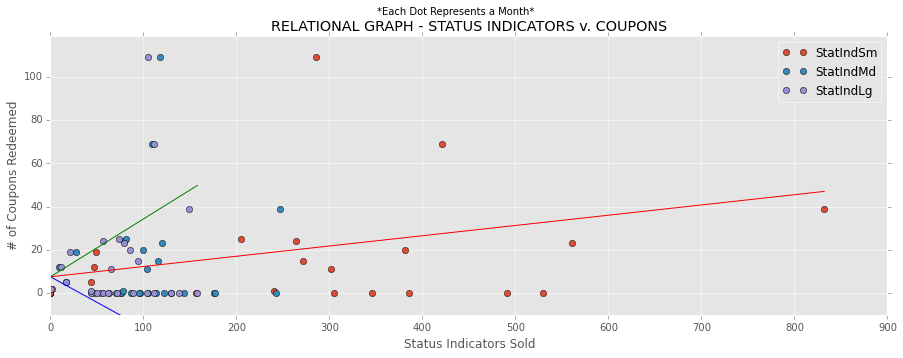

In [992]:
# RELATIONAL GRAPH - STATUS INDICATORS & COUPONS
X_list = ['StatIndSm', 'StatIndMd', 'StatIndLg']
y = time_data['coupon_sum']
X = time_data[X_list]

plt.figure(figsize=(15, 5))
plt.plot(X, y, 'o')
plt.suptitle('*Each Dot Represents a Month*')
plt.title('RELATIONAL GRAPH - STATUS INDICATORS v. COUPONS')
plt.xlabel('Status Indicators Sold')
plt.ylabel('# of Coupons Redeemed')
plt.ylim(-10, y.max()+10)
plt.legend(X_list)

### PLOTTING R^2 LINE IN GRAPH
plt.plot(xSm, ySm, 'r-')
plt.plot(xMd, yMd, 'b-')
plt.plot(xLg, yLg, 'g-')
# plt.legend(xSm)


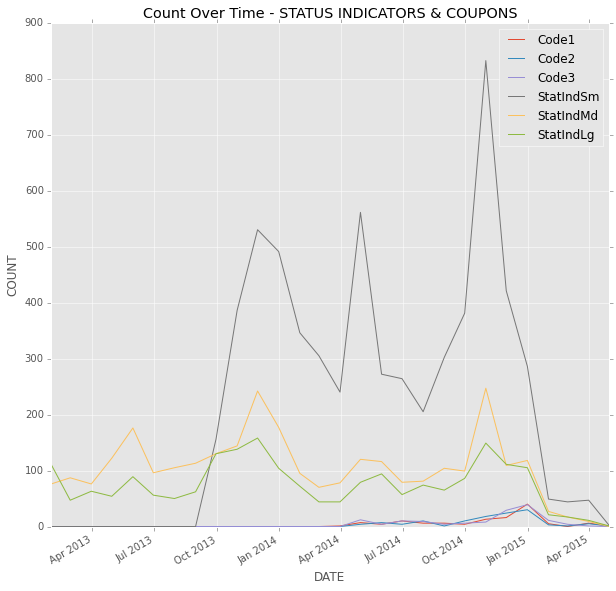

In [994]:
from matplotlib.dates import YearLocator, DateFormatter

time_data_noind = time_data.reset_index()
time_data_noind

time_x = time_data_noind.time_stamp
timeylist = ['Code1', 'Code2', 'Code3', 'StatIndSm', 'StatIndMd', 'StatIndLg']
time_y = time_data_noind[ylist]

# tick_every_n = YearLocator(1)
# date_formatter = DateFormatter('%b %Y')

plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(time_x, time_y)
plt.title('Count Over Time - STATUS INDICATORS & COUPONS')
plt.xlabel('DATE')
plt.ylabel('COUNT')
plt.legend(timeylist)
fig.autofmt_xdate()
plt.show()

### Question #2: FutureHome is looking to increase repeat customers. Are there products that appear to encourage further sales?
- SubQ1: What items are most likely to be sold first?
- SubQ2: What items are most likely to be included in high purchase count users?

**SubA2: The Small Status Indicator is the most likely item to be sold first for users purchasing more than 2 items but the dashboard + monitor moves up to the most prominent items after users make 9 or more purchases.**

**SubA2: ...**

### What item is sold first?

#### Data: Tweaking/Cleaning Data

In [1018]:
sorted_data = data.copy().sort(['user_id', 'time_stamp'], ascending=[True, True])
sorted_purch_data = sorted_data[sorted_data['item_price'] > 0]


In [534]:
# Exporting sorted_purch_data for modification in Excel
out_csv = '/Users/brianporter/datascience_assesment/sorted_purch_out.csv'
sorted_purch_data.to_csv(out_csv)

In [1020]:
# Importing sorted_purch_data with additional column that shows order each item was purchased per user
# 1 represents first purchase by user, 2: second purchase, etc.
raw_data3 = pd.read_csv("sorted_purch_in.csv")
sorted_purch_in = raw_data3.copy()


In [1068]:
# Count of first purchase items
first_purch = sorted_purch_in[sorted_purch_in['purch_count'] == 1]
print(first_purch['item_name'].value_counts())

Status Indicator Sm    1957
Base Station           1670
Status Indicator Md    1085
Status Indicator Lg     995
Launch Button           766
Dashboard               658
Dashboard + Monitor     423
Alarm                   167
Signal Amplifier         70
Spy Camera               40
Remote                   12
dtype: int64


In [1053]:
# shows most prominently sold item when purchase 2 or more
number = 4 # filters minimum purchases/user
individual_customer_purchases = [number]
multibuyer_data = sorted_purch_in[sorted_purch_in['purch_count'] >= individual_customer_purchases]
percent_of_multipurchases = len(multibuyer_data)/len(sorted_purch_in['purch_count'])
item_name_val_list = multibuyer_data['item_name'].value_counts()
print("Individuals who made",number,"or more purchaess make up","{0:.2f}%".format(percent_of_multipurchases*100),"of multi-purchase customers")
print("The most common item being:",item_name_val_list[:1])
print("")
print("Items sold: ")
print(item_name_val_list)

Individuals who made 4 or more purchaess make up 23.41% of multi-purchase customers
The most common item being: Status Indicator Sm    1640
dtype: int64

Items sold: 
Status Indicator Sm    1640
Dashboard + Monitor     665
Status Indicator Md     629
Base Station            444
Dashboard               422
Status Indicator Lg     389
Launch Button           371
Alarm                   242
Signal Amplifier        118
Spy Camera               61
Remote                    7
dtype: int64


In [ ]:
print('Individuals who made 2 or more purchases make up 63.19% of purchasing customers.')
print('Individuals who made 3 or more purchases make up 38.33% of purchasing customers.')
print('Individuals who made 4 or more purchases make up 23.41% of purchasing customers.')

In [1019]:
# sorted_purch_in.head(6)

In [863]:
# creating list for all unique item names
item_name_list = list(sorted_purch_in['item_name'].unique())
item_name_list
print("List of Items Purchase (greatest to least):")
print(sorted_purch_in['user_id'].value_counts())

List of Items Purchase (greatest to least):
220916059    135
220101399     33
222317679     31
221861773     30
222180047     24
219582243     24
220636241     21
223957625     20
225174049     19
223979889     18
224501069     17
222685035     17
225214529     16
219126843     16
223048343     16
221830907     16
221941215     15
224237443     15
225287393     15
222611665     15
222782693     15
224767225     15
220204623     15
225134581     15
222567137     15
221930083     15
222062149     14
221820787     14
222888447     14
222894013     14
            ... 
224794549      1
226052465      1
226592873      1
225364305      1
222558535      1
219191611      1
225798453      1
223987985      1
225978589      1
224295127      1
225851583      1
225290429      1
222484659      1
226719879      1
224475263      1
225904713      1
225527743      1
225343559      1
224221251      1
222537789      1
225216553      1
219605013      1
225089547      1
222844931      1
226170869      1
2209

In [816]:
item_name_list

['Status Indicator Sm',
 'Alarm',
 'Launch Button',
 'Dashboard + Monitor',
 'Status Indicator Md',
 'Dashboard',
 'Base Station',
 'Status Indicator Lg',
 'Signal Amplifier',
 'Spy Camera',
 'Remote']

In [844]:
len(sorted_purch_in[sorted_purch_in['purch_count'] >= 20])


8167

In [852]:
multi_y = multibuyer_data['purch_count'].values
multi_x = multibuyer_data['item_val'].values
multi_X = sm.add_constant(multi_x, prepend=True)
# plt.figure(figsize=(15, 5))
# plt.plot(x=multi_x, y= multi_y, kind='bar')
# multibuyer_data.plot(kind='scatter', x='item_val', y='purch_count', figsize=(16, 8))

In [853]:
len(multi_X)

13465

In [854]:
results = sm.OLS(multi_y, multi_X).fit()
multi_intercept, multi_slope = results.params

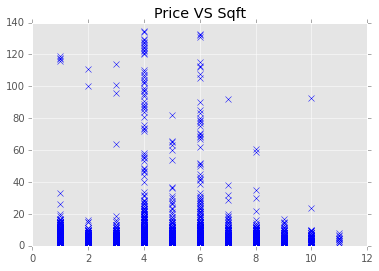

In [903]:
plt.plot(multi_x, multi_y, 'bx')
plt.title("Price VS Sqft")
xl = np.array([min(multi_x), max(multi_x)])
yl = intercept + slope * xl
# plt.plot(xl, yl, 'r-')
plt.show()

In [856]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05241
Date:                Sat, 12 Dec 2015   Prob (F-statistic):              0.819
Time:                        17:04:35   Log-Likelihood:                -46982.
No. Observations:               13465   AIC:                         9.397e+04
Df Residuals:                   13463   BIC:                         9.398e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.3532      0.127     34.247      0.000         4.104     4.602
x1            -0.0059      0.026     -0.229      0.819        -0.056     0.044
==============================================================================
Omnibus:                    22042.401   Durbin-Watson:                   0.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11803807.965
Skew:                          11.136   Prob(JB):                         0.00
Kurtosis:                     146.329   Cond. No.                         9.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [570]:
# creating numerical value for item names so can be graphed and analyzed
sorted_purch_in['item_val'] = sorted_purch_in['item_name']
sorted_purch_in['item_val'] = sorted_purch_in['item_val'].replace(item_name_list, \
                                                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
sorted_purch_in.head()

,Unnamed: 0,user_id,action_type,time_stamp,dealer,coupon_code,dist_channel,item_name,item_price,purch_count,item_val
0,46377,218545449,purchase,2014-11-21 00:00:00,Southern,NaN,Retail,Status Indicator Sm,203,1,1
1,28626,218565183,purchase,2013-05-28 00:00:00,Cambridge,NaN,Retail,Alarm,699,1,2
2,28080,218565183,purchase,2013-06-17 00:00:00,Cambridge,NaN,Retail,Launch Button,699,2,3
3,50936,218565183,purchase,2014-10-14 00:00:00,Target,NaN,Retail,Status Indicator Sm,203,3,1
4,50937,218565183,purchase,2014-10-28 00:00:00,Target,NaN,Retail,Status Indicator Sm,203,4,1


In [705]:
first_purch_list = sorted_purch_in[sorted_purch_in['purch_count'] == 1]
first_purch_list['item_name'].value_counts()
# sorted_purch_in['purch_count'].value_counts()

Status Indicator Sm    1957
Base Station           1670
Status Indicator Md    1085
Status Indicator Lg     995
Launch Button           766
Dashboard               658
Dashboard + Monitor     423
Alarm                   167
Signal Amplifier         70
Spy Camera               40
Remote                   12
dtype: int64

In [777]:
# create linear regression model us Statsmodels
lm = smf.ols(formula='coupon_sum ~ StatIndSm + StatIndMd + StatIndLg', data=time_data).fit()

# y, X = dmatrices(formula='coupon_sum ~ StatIndSm + StatIndMd + StatIndLg', data=time_data, return_type='dataframe')


# print the coefficients
lm.params

Intercept    7.585388
StatIndSm    0.047436
StatIndMd   -0.236160
StatIndLg    0.267320
dtype: float64

In [ ]:
xl = np.array([min(x), max(x)])
yl = intercept + slope * xl
plt.plot(xl, yl, 'r-')
plt.show

In [563]:
raw_data4 = pd.read_csv("item_sales_data.csv")
item_sales_data = raw_data4.copy()
# item_sales_data.dropna(axis=0)
item_sales_data.sort(['item_price']), item_sales_data.sort(['ItemSalesCount'], ascending=True)

(              item_name  item_price  ItemSalesCount  ItemSalesTotal
 6      Signal Amplifier          98             304           29792
 10  Status Indicator Sm         203            5866         1190798
 9   Status Indicator Md         295            2787          822165
 2             Dashboard         344            1498          515312
 5                Remote         344              18            6192
 8   Status Indicator Lg         397            1976          784472
 3   Dashboard + Monitor         502            1513          759526
 1                 Alarm         699             708          494892
 4         Launch Button         699            1684         1177116
 7            Spy Camera         699             154          107646
 0                   NaN         NaN            5494             NaN,
               item_name  item_price  ItemSalesCount  ItemSalesTotal
 5                Remote         344              18            6192
 7            Spy Camera         

In [919]:
time_data

,item_price,Code1,Code2,Code3,coup_count,LaunchButton,DashboardMonitor,SpyCamera,Alarm,Dashboard,SignalAmplifier,StatIndLg,StatIndSm,StatIndMd,BaseStation,Remote,coupon_sum
time_stamp,,,,,,,,,,,,,,,,,
2013-01-31,131636,0,0,0,0,0,63,4,9,51,0,111,0,76,132,2,0
2013-02-28,129489,0,0,0,0,34,62,0,11,52,0,47,0,87,78,3,0
2013-03-31,162622,0,0,0,0,62,45,9,28,47,0,63,0,76,88,9,0
2013-04-30,187481,0,0,0,0,71,57,1,30,71,0,54,0,122,107,2,0
2013-05-31,221291,0,0,0,0,71,82,0,15,67,0,89,0,176,192,2,0
2013-06-30,158083,0,0,0,0,61,64,0,11,56,0,56,0,96,109,2,0
2013-07-31,168075,0,0,0,0,54,75,0,27,50,0,50,0,105,123,0,0
2013-08-31,162898,0,0,0,0,70,46,0,13,54,0,62,0,113,112,0,0
2013-09-30,262719,0,0,0,0,74,87,0,26,61,0,130,156,130,139,0,0


In [922]:
intercept, slope1, slope2, slope3 = lm.params

In [928]:
time_data.corr()

,item_price,Code1,Code2,Code3,coup_count,LaunchButton,DashboardMonitor,SpyCamera,Alarm,Dashboard,SignalAmplifier,StatIndLg,StatIndSm,StatIndMd,BaseStation,Remote,coupon_sum
item_price,1.000000,0.284778,0.380110,0.251922,NaN,0.888026,0.713911,0.506674,0.771044,0.854674,0.504343,0.842395,0.889843,0.869093,0.547913,-0.186539,0.310933
Code1,0.284778,1.000000,0.907141,0.931749,NaN,0.334363,0.030426,-0.150010,0.591925,0.194051,0.502066,0.210454,0.324189,0.089572,-0.253187,-0.187598,0.974218
Code2,0.380110,0.907141,1.000000,0.906256,NaN,0.441047,0.044740,-0.171239,0.665088,0.238856,0.723545,0.313731,0.424691,0.162514,-0.288873,-0.157977,0.962749
Code3,0.251922,0.931749,0.906256,1.000000,NaN,0.309221,0.016850,-0.142274,0.578909,0.126571,0.483543,0.188652,0.302500,0.020246,-0.257708,-0.166800,0.976609
coup_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LaunchButton,0.888026,0.334363,0.441047,0.309221,NaN,1.000000,0.621384,0.311887,0.795981,0.823839,0.521734,0.663589,0.712867,0.777837,0.353033,-0.092649,0.368463
DashboardMonitor,0.713911,0.030426,0.044740,0.016850,NaN,0.621384,1.000000,0.270952,0.514938,0.849149,0.035914,0.714014,0.407627,0.721416,0.516233,-0.002506,0.030743
SpyCamera,0.506674,-0.150010,-0.171239,-0.142274,NaN,0.311887,0.270952,1.000000,0.225184,0.357179,-0.126143,0.252761,0.579069,0.342058,0.617306,-0.041911,-0.158211
Alarm,0.771044,0.591925,0.665088,0.578909,NaN,0.795981,0.514938,0.225184,1.000000,0.739304,0.583270,0.557850,0.693726,0.496913,0.021931,-0.068696,0.627513
Dashboard,0.854674,0.194051,0.238856,0.126571,NaN,0.823839,0.849149,0.357179,0.739304,1.000000,0.298366,0.727144,0.603416,0.781926,0.418024,-0.001530,0.188542


In [454]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             coupon_sum   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2.136
Date:                Thu, 10 Dec 2015   Prob (F-statistic):              0.122
Time:                        20:36:23   Log-Likelihood:                -125.45
No. Observations:                  28   AIC:                             258.9
Df Residuals:                      24   BIC:                             264.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.5854      9.531      0.796      0.434       -12.085    27.256
StatIndSm      0.0474      0.027      1.777      0.088        -0.008     0.103
StatIndMd     -0.2362      0.149     -1.586      0.126        -0.543     0.071
StatIndLg      0.2673      0.213      1.255      0.222        -0.172     0.707
==============================================================================
Omnibus:                       34.467   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.455
Skew:                           2.440   Prob(JB):                     6.88e-22
Kurtosis:                      10.727   Cond. No.                         728.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
# create a DataFrame with the minimum and maximum values of TV
X_stat = pd.DataFrame({'StatIndSm': [time_data.StatIndSm.min(), time_data.StatIndSm.max()]},
                     {'StatIndMd': [time_data.StatIndMd.min(), time_data.StatIndMd.max()]},
                     {'StatIndLg': [time_data.StatIndLg.min(), time_data.StatIndLg.max()]})
X_stat.head()

,StatIndLg
StatIndMd,NaN


In [523]:
sm.stats.linear_rainbow(lm)

(7.7731821722139829, 0.0012639211084029185)

In [522]:
sm.graphics.plot_partregress('coupon_sum', 'StatIndLg', ['StatIndSm', 'StatIndMd']
                              data=time_data, obs_labels=False)

SyntaxError: invalid syntax (<ipython-input-522-a0a338c95dbb>, line 2)

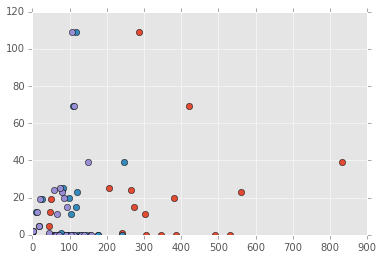

In [521]:
# Plotting R^2
y = time_data['coupon_sum']
X = time_data[['StatIndSm', 'StatIndMd', 'StatIndLg']]

plt.plot(X, y, 'o') # x, y_true, 'b-');


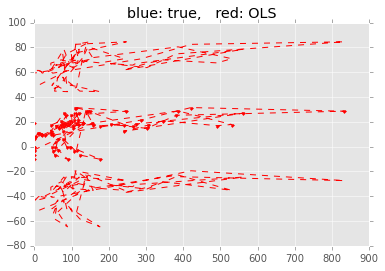

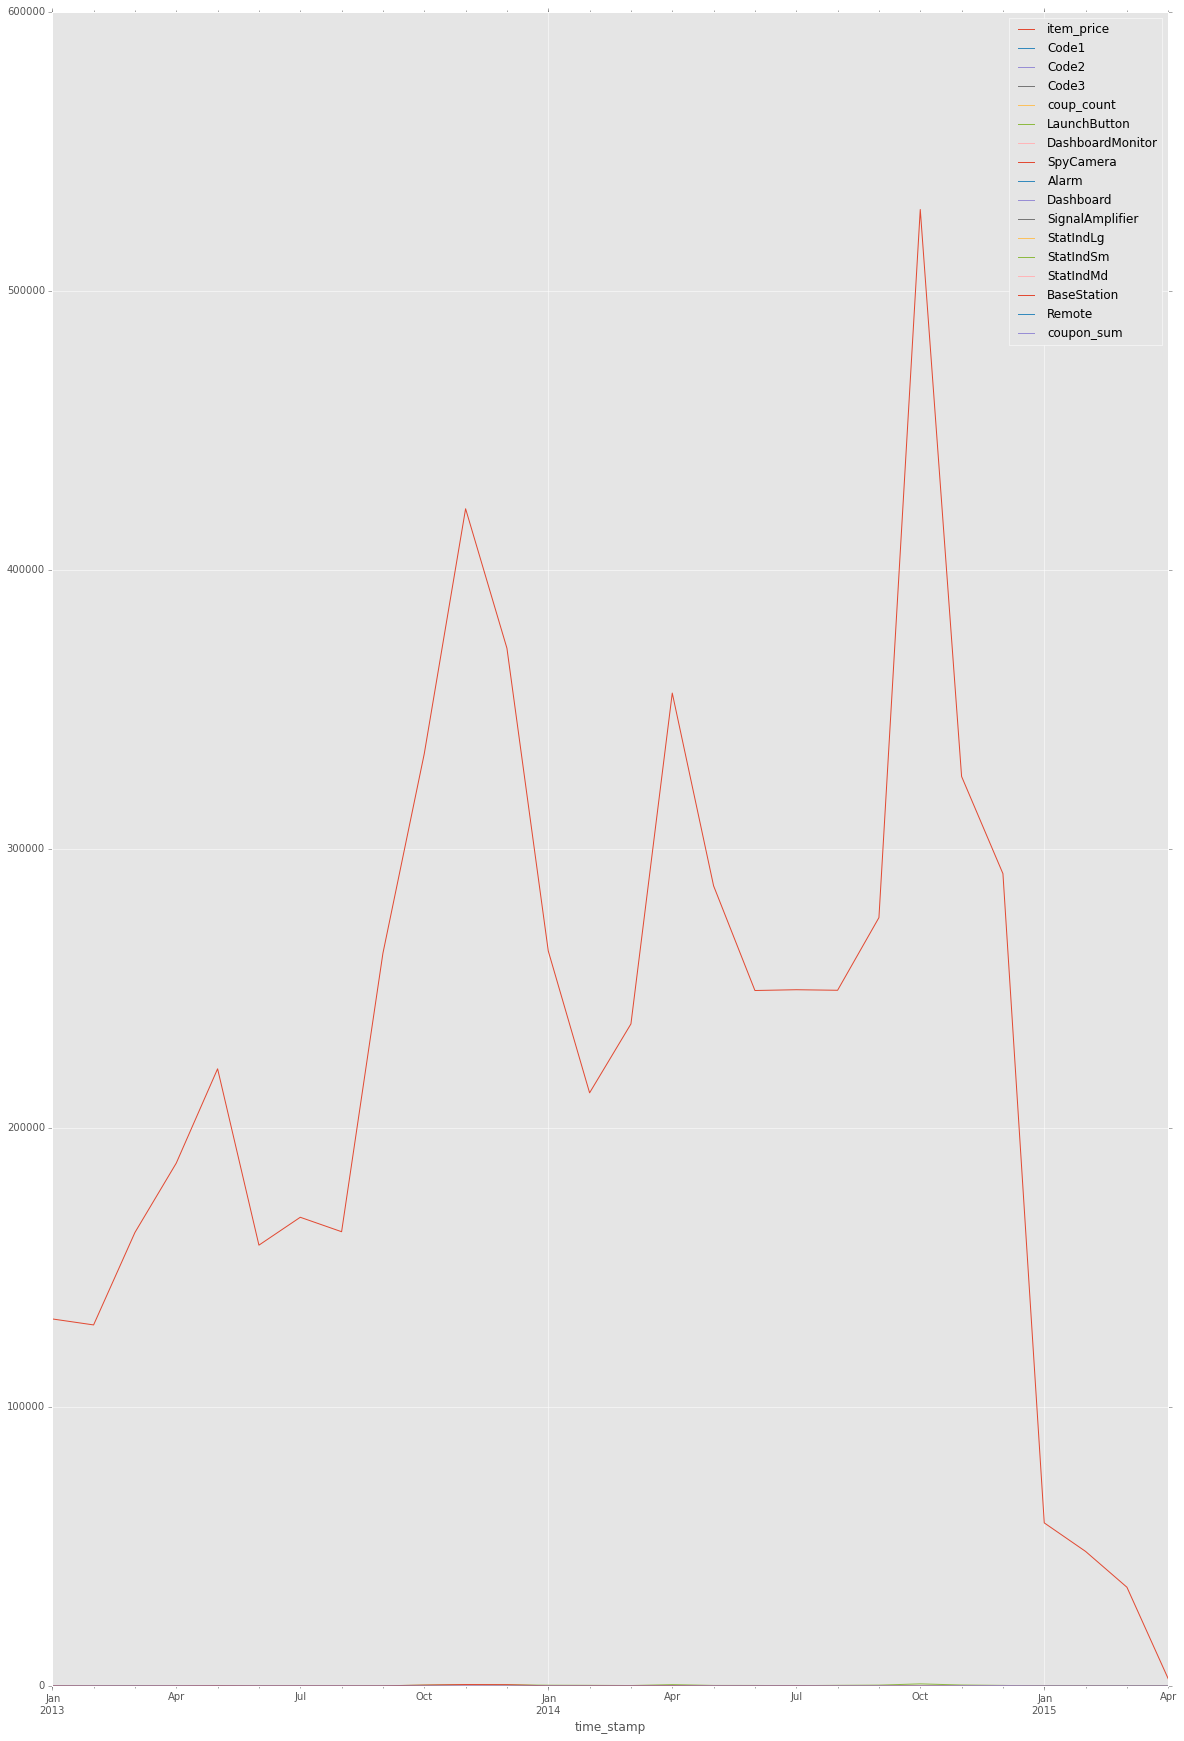

In [941]:
plt.figure(); 

# y = time_data_noind.LaunchButton
# x = time_data_noind.time_stamp
time_data.plot(kind='line', figsize=(20,30), subplots=False)
# time_data_noind = time_data.reset_index() # .plot(x=x, y=time_data['LaunchButton'])
# time_data_noind.plot(x=x, y=y)



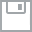
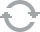
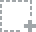
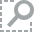
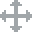
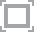
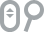
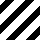
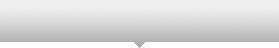
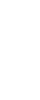
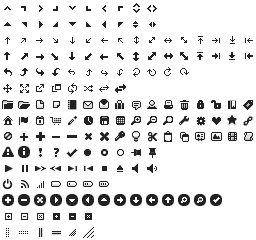
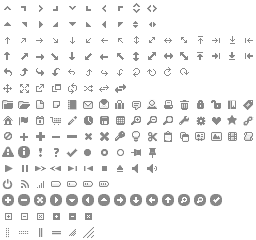
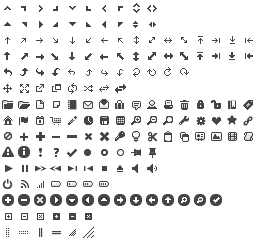
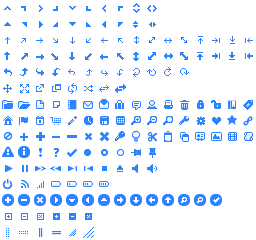
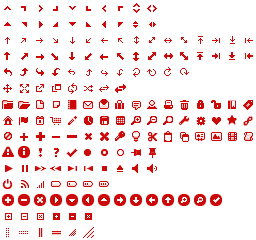
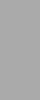
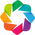
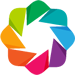

In [932]:
from bokeh.plotting import figure, output_notebook, show

# prepare some data
# x = [1, 2, 3, 4, 5]
# y = [6, 7, 2, 4, 5]

x = time_data_noind.time_stamp
ylist = ['Code1', 'Code2', 'Code3', 'StatIndSm']
y = time_data_noind['StatIndSm']

# output to static HTML file
output_notebook() #"lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend='Code1' , line_width=2)

# show the results
show(p)

,user_id,action_type,time_stamp,dealer,coupon_code,dist_channel,item_name,item_price,time_int,coupon_num,purchase_count
0,224970131,partner_integration,2014-10-07,NaN,NaN,NaN,NaN,0,1412640000000000000,0,0
1,224340667,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,1412726400000000000,0,0
2,225046537,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,1412726400000000000,0,0
3,225046537,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,1412726400000000000,0,0
4,219614121,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,1412726400000000000,0,0


In [124]:
type(data.time_stamp[0])

pandas.tslib.Timestamp

In [398]:
# creating purchase count column that signals purchase or not
# data.loc[data['action_type'] == 'purchase', 'purchase_count'] = 1
# data.loc[data['action_type'] != 'purchase', 'purchase_count'] = 0

In [905]:
purch_data.head()

,user_id,BaseStation,LaunchButton,StatusIndicatorSm,StatusIndicatorLg,StatusIndicatorMd,Dashboard,Alarm,DashboardMonitor,SignalAmplifier,SpyCamera,Remote,CouponCode1,CouponCode2,CouponCode3
0,218545449,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,218565183,0,1,2,0,0,0,1,0,0,0,0,0,0,0
2,218566195,0,0,0,0,0,0,1,2,0,0,0,0,0,0
3,218567207,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,218568725,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### purch_data: Cleaning/Tweaking

In [74]:
# create coupon sum column
purch_data['coupon_sum'] = purch_data[['CouponCode1', 'CouponCode2', \
                                     'CouponCode3']].apply(np.sum, axis=1)

# create status indicator sum column
purch_data['statind_sum'] = purch_data[['StatusIndicatorSm', 'StatusIndicatorMd', \
                                     'StatusIndicatorLg']].apply(np.sum, axis=1)

# create total purchases column
purch_data['total_purch_sum'] = purch_data[['BaseStation', 'LaunchButton', 'StatusIndicatorSm',\
                                            'StatusIndicatorMd', 'StatusIndicatorLg', 'Dashboard',\
                                            'Alarm', 'DashboardMonitor', 'SignalAmplifier', \
                                            'SpyCamera', 'Remote']].apply(np.sum, axis=1)


# purch_data

In [400]:
# create coupon sum column
purch_data['coupon_sum'] = purch_data[['CouponCode1', 'CouponCode2', \
                                     'CouponCode3']].apply(np.sum, axis=1)

TypeError: ("'int' object is not callable", 'occurred at index 0')

In [75]:
statind_data = purch_data[purch_data['statind_sum'] > 0]
print(len(statind_data))
statind_data

5727


,user_id,BaseStation,LaunchButton,StatusIndicatorSm,StatusIndicatorLg,StatusIndicatorMd,Dashboard,Alarm,DashboardMonitor,SignalAmplifier,SpyCamera,Remote,CouponCode1,CouponCode2,CouponCode3,coupon_sum,statind_sum,total_purch_sum
0,218545449,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,218565183,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,2,4
3,218567207,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2
6,218583905,0,1,0,2,0,0,0,0,0,0,0,0,1,0,1,2,3
7,218586435,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,2
8,218590483,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
9,218594025,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
12,218613253,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,3,4
13,218620337,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
14,218632987,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1


### logistic regression

In [76]:
# Import Logistic Regression libraries
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1213736d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12e372a90>]], dtype=object)

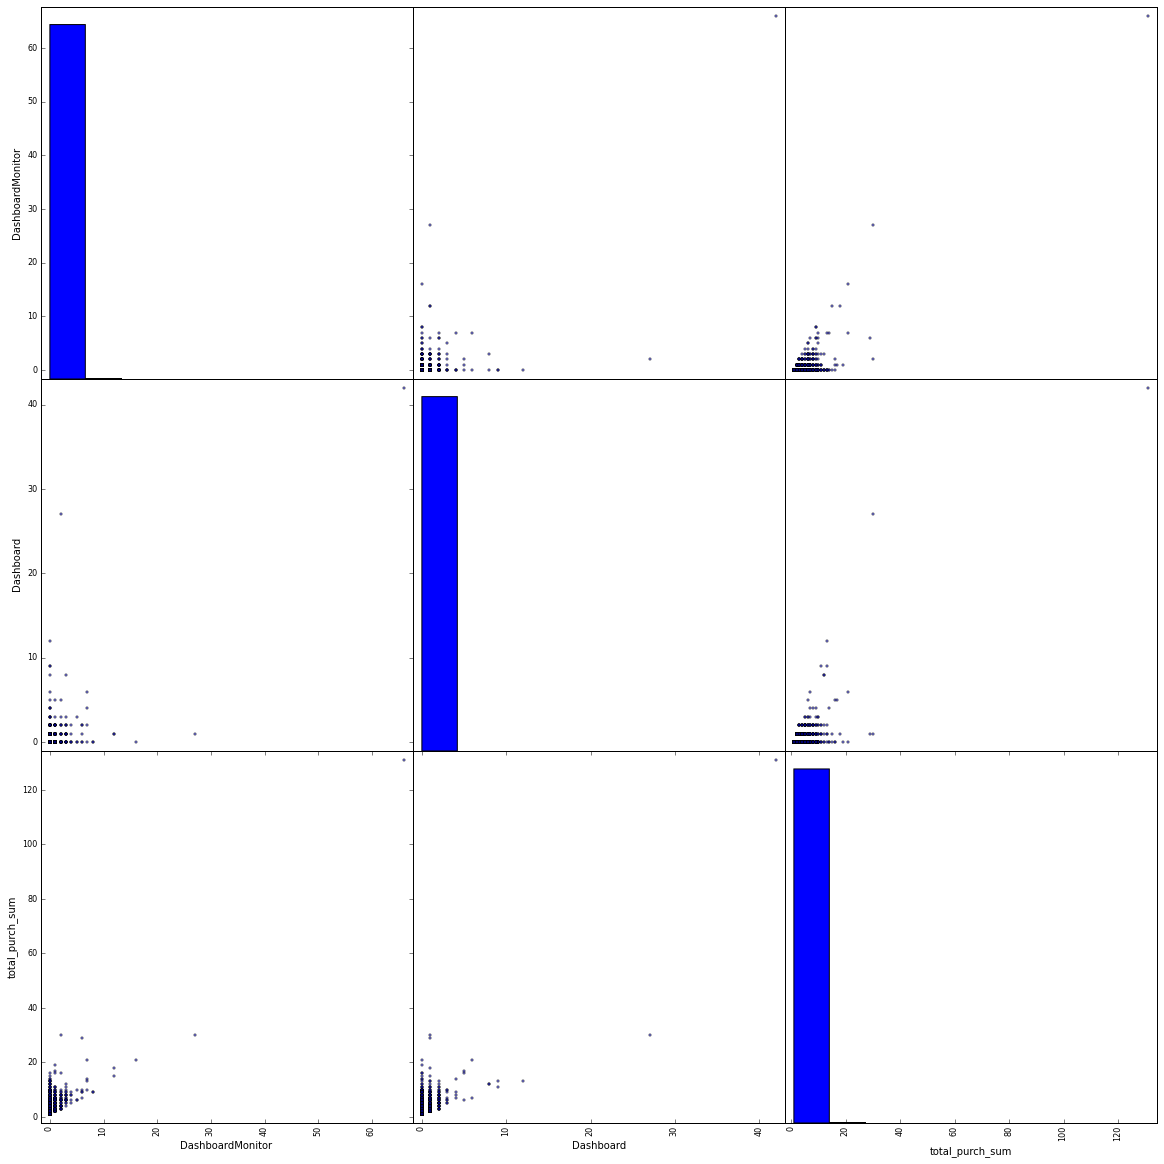

In [100]:
scatter_matrix(statind_data[['DashboardMonitor', 'Dashboard', 'total_purch_sum']], figsize = (20,20))

### Exploring Data

In [83]:
data.describe()

,user_id,item_price,time_int,coupon_num
count,5.296700e+04,52967.000000,5.296700e+04,52967.000000
mean,2.231275e+08,120.535390,1.399403e+18,0.014462
std,4.507133e+06,193.596488,1.649195e+16,0.185008
min,1.000000e+00,0.000000,1.356998e+18,0.000000
25%,2.218597e+08,0.000000,1.387757e+18,0.000000
50%,2.233383e+08,0.000000,1.402013e+18,0.000000
75%,2.248548e+08,203.000000,1.412294e+18,0.000000
max,2.268747e+08,699.000000,1.429574e+18,3.000000


In [88]:
data.corr()

,user_id,item_price,time_int,coupon_num
user_id,1.000000,0.044425,0.224038,0.021418
item_price,0.044425,1.000000,-0.235855,0.069052
time_int,0.224038,-0.235855,1.000000,0.066349
coupon_num,0.021418,0.069052,0.066349,1.000000


In [50]:
purch_data.head()

,user_id,dist_channel,BaseStation,LaunchButton,StatusIndicatorSm,StatusIndicatorLg,StatusIndicatorMd,Dashboard,Alarm,DashboardMonitor,SignalAmplifier,SpyCamera,Remote,CouponCode1,CouponCode2,CouponCode3
0,218545449,Retail,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,218565183,Retail,0,1,2,0,0,0,1,0,0,0,0,0,0,0
2,218566195,Holographic Commerce,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,218566195,Online,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,218567207,Retail,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [89]:
purch_data.describe()

,user_id,BaseStation,LaunchButton,StatusIndicatorSm,StatusIndicatorLg,StatusIndicatorMd,Dashboard,Alarm,DashboardMonitor,SignalAmplifier,SpyCamera,Remote,CouponCode1,CouponCode2,CouponCode3,coupon_sum,statind_sum,total_purch_sum
count,7.078000e+03,7078,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.00000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000
mean,2.238473e+08,0,0.237920,0.828765,0.279175,0.393755,0.211642,0.100028,0.213761,0.04295,0.021758,0.002543,0.015117,0.014411,0.016954,0.046482,1.501695,2.332297
std,1.793265e+06,0,0.465473,1.077370,0.594634,0.753645,0.861380,0.314768,1.225672,0.20758,0.150666,0.055697,0.151009,0.137875,0.165553,0.345280,1.402348,2.515978
min,2.185454e+08,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.227050e+08,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.239513e+08,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,2.253337e+08,0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,2.268742e+08,0,4.000000,14.000000,7.000000,18.000000,42.000000,3.000000,66.000000,2.00000,3.000000,2.000000,3.000000,2.000000,5.000000,8.000000,20.000000,131.000000


In [97]:
print(purch_data.corr())
# observations
# - DashboardMonitor has highest correlation to total purchases
# - Dashboard has 2nd highest correlation to total purchases

                    user_id  BaseStation  LaunchButton  StatusIndicatorSm  \
user_id            1.000000          NaN     -0.060056           0.028473   
BaseStation             NaN          NaN           NaN                NaN   
LaunchButton      -0.060056          NaN      1.000000           0.041803   
StatusIndicatorSm  0.028473          NaN      0.041803           1.000000   
StatusIndicatorLg -0.046576          NaN     -0.014361          -0.051312   
StatusIndicatorMd -0.087122          NaN      0.070053          -0.046599   
Dashboard         -0.070077          NaN      0.022765          -0.052605   
Alarm             -0.018136          NaN      0.476956           0.074682   
DashboardMonitor  -0.076070          NaN      0.096600          -0.048038   
SignalAmplifier    0.107446          NaN      0.077029           0.077750   
SpyCamera         -0.050361          NaN      0.186091           0.059517   
Remote            -0.060426          NaN     -0.001540           0.004903   

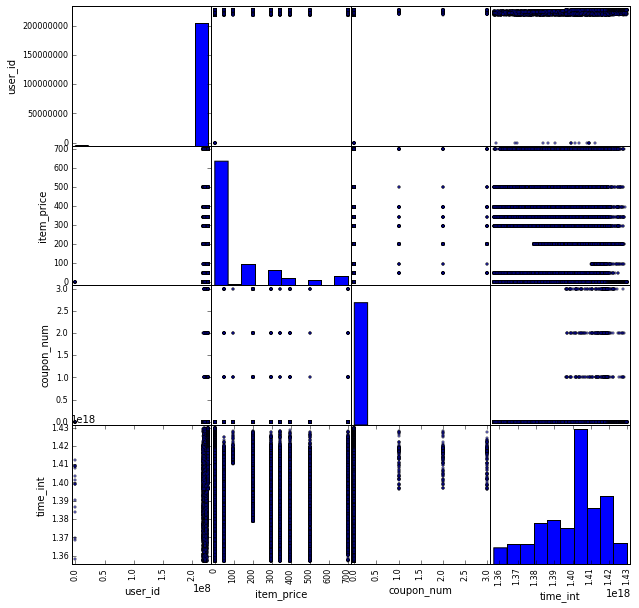

In [26]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (10,10))

In [27]:
# Unique items in table
unique_actions = pd.unique(data.action_type)
unique_coup_codes = pd.unique(data.coupon_code)
unique_items = pd.unique(data.item_name)

print("Unique Actions: ", unique_actions)  # prints unique actions
print("Unique Coupons: ", unique_coup_codes)  # prints unique coupon codes
print("Unique Items:   ", unique_items)  # prints unique coupon codes


Unique Actions:  ['partner_integration' 'email_sub' 'email_unsub' 'purchase']
Unique Coupons:  [nan 'code1' 'code3' 'code2']
Unique Items:    [nan 'Launch Button' 'Dashboard + Monitor' 'Spy Camera' 'Alarm' 'Dashboard'
 'Signal Amplifier' 'Status Indicator Lg' 'Status Indicator Sm'
 'Status Indicator Md' 'Base Station' 'Remote']


In [111]:
# finding number of unique users, average actions & purchases per user
unique_users = (pd.unique(data.user_id))
purchase_data = data[data['action_type'] == 'purchase']
len(pd.unique(purchase_data['user_id']))

7906

In [107]:
print("Unique Users: ", len(unique_users))
print("Avg. Actions/User: ", "{:.2f}".format(len(data.user_id)/len(unique_users)))
print("Avg. Purchases/User: ", "{:.2f}".format(len(purchase_data.user_id)/len(unique_users)))
len(purchase_data.user_id)

Unique Users:  16347
Avg. Actions/User:  3.24
Avg. Purchases/User:  0.52


8526

In [104]:
purch_data['total_purch_sum'].sum()

16508

In [30]:
# data_coupon_code_nonull = data.dropna()

In [31]:
# data that only contains purchases with coupon
coup_codes = unique_coup_codes[1:4]
coupon_data = data.loc[data['coupon_code'].isin(coup_codes)]

print(len(coupon_data))
coupon_data

374


,user_id,action_type,time_stamp,dealer,coupon_code,dist_channel,item_name,item_price,coupon_num,time_int
15168,224518779,purchase,2014-11-11,other,code1,Dist Partners,Launch Button,699,1,1415664000000000000
15244,224722697,purchase,2014-08-11,online,code3,Online,Status Indicator Sm,203,3,1407715200000000000
24078,225551525,purchase,2014-10-13,other,code3,Dist Partners,Launch Button,699,3,1413158400000000000
24085,224865895,purchase,2014-08-31,online,code1,Online,Launch Button,699,1,1409443200000000000
24524,225436157,purchase,2014-11-26,other,code3,Online,Dashboard,344,3,1416960000000000000
24751,218583905,purchase,2014-10-15,other,code2,Dist Partners,Status Indicator Lg,397,2,1413331200000000000
24778,224252117,purchase,2014-05-19,online,code2,Online,Status Indicator Lg,397,2,1400457600000000000
24786,224467673,purchase,2014-06-23,other,code1,Online,Status Indicator Lg,397,1,1403481600000000000
24788,225090053,purchase,2014-10-03,other,code3,Dist Partners,Status Indicator Lg,397,3,1412294400000000000
24792,220404999,purchase,2014-04-02,online,code1,Online,Status Indicator Lg,397,1,1396396800000000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5e27b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c497d30>]], dtype=object)

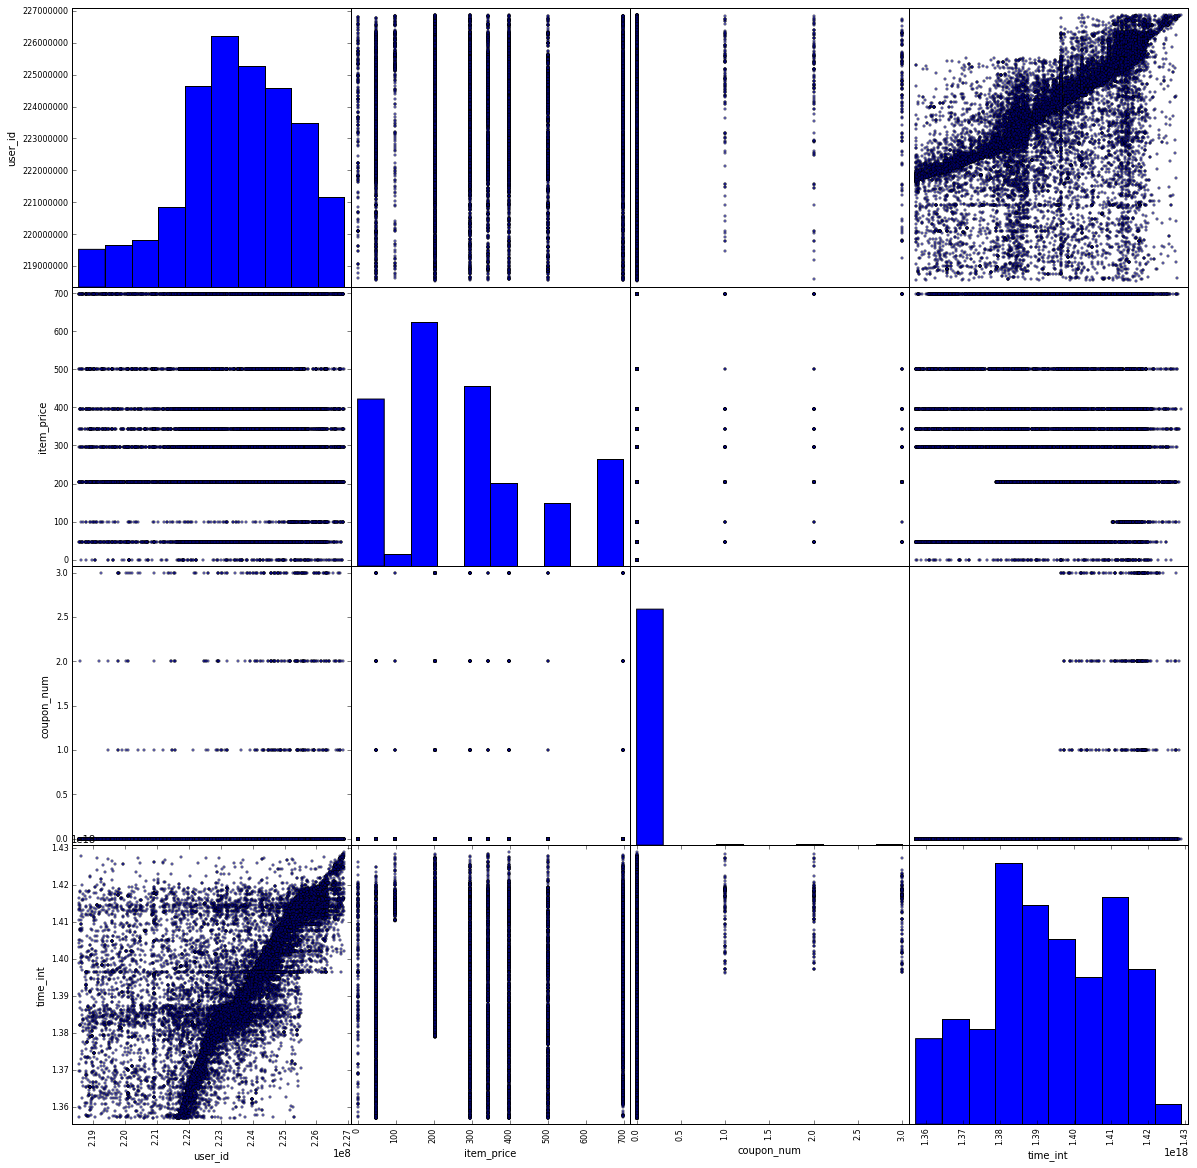

In [44]:
scatter_matrix(purchase_data, figsize = (20,20))

In [33]:
stat_inds = ['Status Indicator Sm', 'Status Indicator Md', 'Status Indicator Lg']
stat_ind_data = data.loc[data['item_name'].isin(stat_inds)]


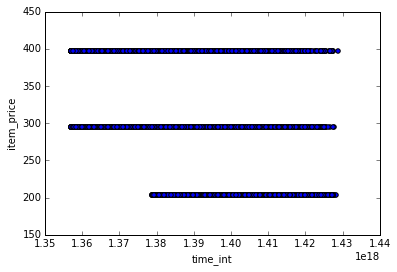

In [35]:
stat_ind_data.head()

stat_ind_data.plot(kind='scatter', x='time_int',y='item_price')

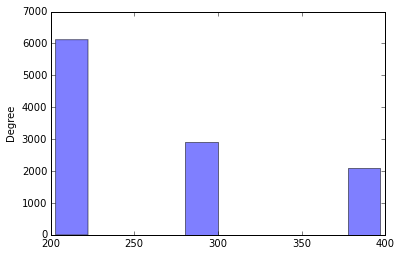

In [130]:
stat_ind_data['item_price'].plot(kind='hist', alpha=0.5)